In [208]:
%run ../talktools.py

# Pandas: versatile tool for data wrangling in Python

* emphasis on tabular data (csv and the like)
* database/spreadsheet-like functionality
* rich support for mixed data (`numpy` is for homogeneous arrays)
* integrates cleanly with `numpy` and `matplotlib`
* really shines with time-series data

<img src="https://covers.oreilly.com/images/0636920050896/lrg.jpg" width="30%">

  - Definitive Book (2nd edition): https://www.oreilly.com/library/view/python-for-data/9781491957653/ (Berkeley link to 3rd edition [here](https://learning.oreilly.com/library/view/python-for-data/9781098104023/))
  - Quick Ref: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
  
(c) Josh Bloom (UC Berkeley) 2006-2022

In [ ]:
import numpy as np
import pandas as pd  # this is by convention
pd.options.display.width = 1000

In [ ]:
s = pd.Series([-1, 20, -30, 40, -50])
s

In [ ]:
s.index

In [ ]:
s.index[2]

In [ ]:
s.values

In [ ]:
s2 = pd.Series([1, 2, np.nan, 4, 5],
                        index=['one', 'two', 'three', 'four', 'five'])
s2

In [ ]:
s2.index[0]

In [ ]:
s2['three']

In [ ]:
s2[2]

In [ ]:
s2[['one', 'three', 'two']]

We haven't touched the original `s2`

In [ ]:
s2

In [ ]:
s3 = s2[:3]

In [ ]:
s2

In [ ]:
s3

In [ ]:
s3.to_dict()

In [ ]:
pd.Series(s3.to_dict())

In [ ]:
df = pd.DataFrame({'A': s2, 'B': s3})
df

In [ ]:
df['A']

In [ ]:
df['B']

### Boolean indexing

In [ ]:
df[df["A"] > 2]

**Note** While many of the NumPy access methods work on DataFrames, use the pandas-specific data access methods,`.loc`, `.iloc`.

See the [Indexing section](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and below.

In [ ]:
df.loc['four']

Select via the position of the passed integers ... looks like NumPy indexing.

In [ ]:
df.iloc[1:3, :]

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
df.values

In [ ]:
df.sort_index(ascending=True)

In [ ]:
df2 = pd.DataFrame(df.values, columns=['A', 'B'])

In [ ]:
df2['A'] = 7.5
df2

In [ ]:
df2.dropna?

In [ ]:
df3 = df2.dropna()
df3

In [ ]:
del df3["A"]
df3

## Reading in Data, Time Series

Let's grab some data on [search trends from Google](https://trends.google.com/trends/explore?date=today%205-y&geo=US&q=tennis,%2Fm%2F0cxn2). We'll read in the output:

In [ ]:
!head -n 10 multiTimeline.csv

In [ ]:
df = pd.read_csv('multiTimeline.csv')
df

In [ ]:
df = df.rename(columns={"Ice cream: (United States)": "ice cream", "tennis: (United States)": "tennis"})
df.head(10)

In [ ]:
df['ice cream']

In [ ]:
df["Week"][:5]

In [ ]:
df.Week[0]

In [ ]:
# Several ways to convert to date
from datetime import datetime
import dateutil.parser as parser

print(parser.parse(df.Week[0]))

In [ ]:
datetime.strptime(df.Week[0], '%Y-%m-%d')

In [ ]:
dates = [datetime.strptime(x, '%Y-%m-%d') for x in df.Week]
dates

In [ ]:
pd.DatetimeIndex(dates)

In [ ]:
# Series in, Series out
pd.to_datetime(df.Week)

In [ ]:
# NumPy array in, DatetimeIndex out
pd.to_datetime(df.Week.values)

In [ ]:
pd.to_datetime(df.Week, format='%Y-%m-%d')

In [ ]:
pd.to_datetime(['96/21/05'], format='%y/%d/%m')

In [ ]:
df.info()

In [ ]:
print(df.to_string())

In [ ]:
from IPython.display import HTML
HTML(df.to_html())

In [ ]:
df['Week'] = pd.to_datetime(df['Week'])
df.dtypes

In [ ]:
# Returns new object without inplace=True!
df.set_index('Week', inplace=True)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df["ice cream"]

In [ ]:
type(df["ice cream"])

In [ ]:
df.index

In [ ]:
df.index[5]

In [ ]:
stamp = df.index[5]
stamp

In [ ]:
stamp.year, stamp.month, stamp.day

In [ ]:
stamp.weekday()

In [ ]:
df.index.year

In [ ]:
df.index.weekday

In [ ]:
df.info()

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt

In [ ]:
df["ice cream"].plot()

In [ ]:
df.plot()

Typically, you'll try to format your data as you read it in. Here we can do all that date and index stuff in one line.

In [ ]:
df = pd.read_csv('multiTimeline.csv', index_col=0, parse_dates=[0]) \
    .rename(columns={"Ice cream: (United States)": "ice cream", "tennis: (United States)": "tennis"})
df.info()

## Merging data frames

We often want to combine dataframes by index, joining columns together on the same index.

In [ ]:
!head full_moon.csv

In [ ]:
moon = pd.read_csv('full_moon.csv',index_col=0,parse_dates=[0])
moon.info()

Below, the merge `how` can be:

  * left: use only keys from left frame (SQL: left outer join)
  * right: use only keys from right frame (SQL: right outer join)
  * outer: use union of keys from both frames (SQL: full outer join)
  * inner: use intersection of keys from both frames (SQL: inner join)

In [ ]:
df = df.merge(moon, left_index=True, right_index=True, how='right')
df

Let's save that for later:

In [ ]:
df.to_csv("merged_data.csv")

In [ ]:
!head merged_data.csv

In [ ]:
df.to_

In [ ]:
import io
a = io.StringIO()
df.to_latex(buf=a)
a.seek(0)
print(a.read())
a.close()

In [ ]:
df[["ice cream","full moon"]]['2019':'2020'].head()

In [ ]:
df[["ice cream","full moon"]]['2021-06':'2021-09']

In [ ]:
stamp

In [ ]:
df["ice cream"][stamp]

In [ ]:
df.loc[stamp]

In [ ]:
years = df.index.year
years

### Grouping 

By “group by” we are referring to a process involving one or more of the following steps

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

See the [Grouping docs](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby) for more.

In [ ]:
annual_min = df.groupby(years).min()
annual_max = df.groupby(years).max()

Another operation to combine dataframes: `pd.concat`

<pre>
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

Concatenate pandas objects along a particular axis with optional set logic
along the other axes. Can also add a layer of hierarchical indexing on the
concatenation axis, which may be useful if the labels are the same (or
overlapping) on the passed axis number
</pre>

In [ ]:
annual_min_and_max = pd.concat([annual_min, annual_max], 
                               axis=1, keys=['min', 'max'])
annual_min_and_max

### Resampling
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#up-and-downsampling

<pre>
B       business day frequency
C       custom business day frequency (experimental)
D       calendar day frequency
W       weekly frequency
M       month end frequency
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T       minutely frequency
S       secondly frequency
L       milliseonds
U       microseconds
N       nanoseconds
</pre>

above from: http://stackoverflow.com/questions/17001389/pandas-resample-documentation

In [ ]:
df["ice cream"].resample('A-JUN').min()  # year end June

In [ ]:
df["ice cream"].resample('A-JUN').agg(['min', 'max'])

In [ ]:
annual_minmax = df.resample('A-JUN').agg(['min', 'max'])
annual_minmax

In [ ]:
annual_minmax.columns

In [ ]:
annual_minmax[('ice cream', 'max')].index

In [ ]:
# Your own aggregation function. How about Mean absolute deviation (MAD)?
def mad(x):
    return np.abs(x - x.mean()).mean()
df["ice cream"].resample('A-JUN').agg(mad)

Let's make a cumulative plot showing the rivalry for Grand Slam major tournaments amongst Nadal, Federer, and Djokovic

In [ ]:
!head tennis.csv

In [ ]:
tennis = pd.read_csv("tennis.csv", index_col=0, parse_dates=True)\
    .sort_index(ascending=True)
winner = tennis[["WINNER"]]
winner

In [ ]:
counts = pd.get_dummies(winner["WINNER"]).cumsum()
counts

In [ ]:
nfd = counts[["Rafael Nadal", "Roger Federer", "Novak Djokovic"]]
nfd

Remove all the years when none of the three won any majors...

In [ ]:
nfd = nfd.loc[(nfd != 0).any(1)]
nfd

In [ ]:
# uncomment for slightly nicer plot
#import seaborn as sns
#sns.set_style("darkgrid")
#sns.set_context("talk")
#import matplotlib
#import matplotlib.pyplot as plt

In [ ]:
nfd.plot(drawstyle="steps-post", figsize=(8, 6), title="Cumulative Major Wins")

Do it all in One Cell...

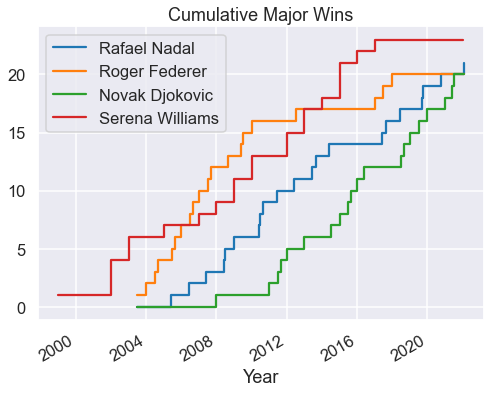

In [207]:
winner = pd.read_csv("tennis.csv", index_col=0, parse_dates=True) \
                    .sort_index(ascending=True)[["WINNER"]]
nfd = pd.get_dummies(winner["WINNER"])\
                     .cumsum()[["Rafael Nadal", "Roger Federer", "Novak Djokovic"]]
nfd = nfd.loc[(nfd!=0).any(1)]  # remove years none of them won

# add Serena Williams
df = pd.read_csv("tennis_womens.csv", index_col=0, parse_dates=True, comment="#")
df = df.replace(to_replace =r'\([^()]*\)', value = '', regex = True)
cumulative = pd.get_dummies(df)\
              .cumsum()[["Australian Open_Serena Williams ", "US Open_Serena Williams ", \
                         "French Open_Serena Williams ", "Wimbledon_Serena Williams "]]
cumulative = cumulative.loc[(cumulative != 0).any(1)]
serena = pd.Series(cumulative.sum(axis=1), name="Serena Williams")
_ = nfd.plot(drawstyle="steps-post", figsize=(8, 6), title="Cumulative Major Wins", legend=False)
_ = serena.plot(drawstyle="steps-post", label="Serena Williams")
plt.legend()

Shifting, correlation, date arithmetic
-------

In [ ]:
df.shift(3).head(10)

In [ ]:
df_1diff = df - df.shift(1)
df_1diff.head(10)

In [ ]:
df_1diff.corr()

In [ ]:
(df - df.shift(6)).corr()

In [ ]:
def lag_corr(table, periods):
    # you may not care but...
    return (table[periods:] - table.shift(periods)).corr()

def pctchg_corr(table, periods):
    # you may not care but...
    return (table[periods:] / table.shift(periods) - 1).corr()

all_lags = [lag_corr(df, i) for i in range(1, 20)]

lags_onetable = pd.concat(all_lags, keys=range(1, 20))
lags_onetable

In [ ]:
unstacked = lags_onetable.unstack(1)
unstacked

In [ ]:
unstacked['ice cream', 'tennis'].plot(label='IC-FM')
unstacked['full moon', 'tennis'].plot(label='FM-VB')

In [ ]:
df_1diff.info()

In [ ]:
df_1diff["ice cream"].corr(df_1diff["ice cream"].shift(1))

In [ ]:
df_1diff.shift(1).head()

In [ ]:
df_1diff.corrwith(df_1diff.shift(1))

In [ ]:
pd.DataFrame({'Lag1': df_1diff.corrwith(df_1diff.shift(1)),
     'Lag2': df_1diff.corrwith(df_1diff.shift(2))})
 

In [ ]:
lag_acorr_table = pd.DataFrame({'Lag%d' % i: 
                                df_1diff.corrwith(df_1diff.shift(i))
         for i in range(1, 7)})
lag_acorr_table

In [ ]:
lag_acorr_table.T

Date arithmetic
====

In [ ]:
df.head(10)

In [ ]:
df.shift(10, freq='H').head(10)

In [ ]:
df.shift(2, freq='M').head(10)

In [ ]:
pdf = df.to_period('M')
pdf.head(10).index

In [ ]:
pdf.index[0]

In [ ]:
pdf.index[0].asfreq('S', 'end')

In [ ]:
pdf.index[0].asfreq('S', 'start')

In [ ]:
pdf.index[0].asfreq('H', 'end') - 5

In [ ]:
# 7th business day
(pdf.index[0].asfreq('B', 'start') + 6).to_timestamp()

In [ ]:
df.head()

In [ ]:
df.shift(4, freq='D').head()

In [ ]:
df.shift(4, freq='D').resample('D').interpolate().head(50)

Time zone handling
----

In [ ]:
stamp = pd.Timestamp(datetime.now())
stamp

In [ ]:
print(stamp.tz)

In [ ]:
stamp.tz_localize('US/Pacific')

In [ ]:
stamp_pac = stamp.tz_localize('US/Pacific')
stamp_pac

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo')

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo').hour

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo').day

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo').value

In [ ]:
stamp_pac.tz_convert('Asia/Tokyo').tz_convert('utc').value

In [ ]:
df_shifted = df.shift(1, freq='4D9H30T')
df_shang = df_shifted\
    .tz_localize('US/Eastern')\
    .tz_convert('Asia/Shanghai')
df_shang

In [ ]:
df_shang.index

In [ ]:
df_shifted = df.shift(1, freq='4D9H30T')
df_shifted\
    .tz_localize('US/Eastern')\
    .tz_convert('US/Pacific').resample('A-DEC').mean()